In [5]:
import numpy as np
from scipy.io import wavfile
import matplotlib.pyplot as plt
from scipy.signal import find_peaks


C:\Users\Windows\AppData\Local\Temp\ipykernel_10964\1355440455.py:1: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sr,y = wavfile.read('teste.wav')


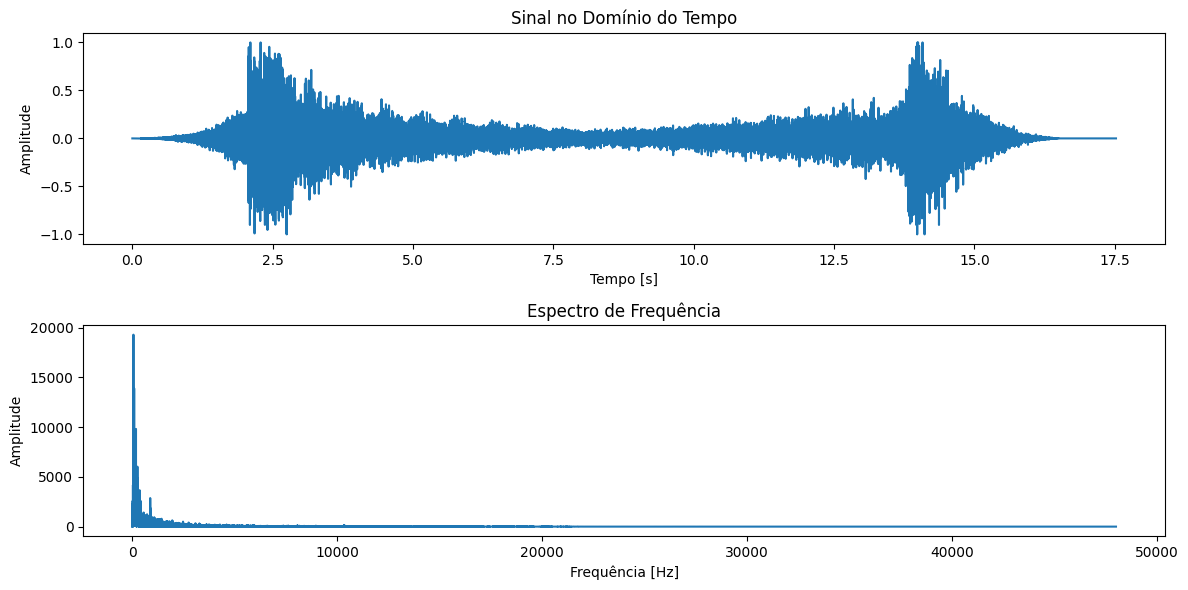

In [11]:
taxa_amostragem,dados_audio = wavfile.read('teste.wav')

if len(dados_audio.shape) > 1:
    dados_audio = dados_audio[:,0]

n = len(dados_audio)

fft_values = np.fft.fft(dados_audio) # armazenamento os valores da FFT do sinal de áudio
fft_freqs = np.fft.fftfreq(n,1/taxa_amostragem) # armazena as frequencias correspodentes

# Retira somente a parte positiva dos espectro de frequência
positive_freq = fft_freqs[:n//2]
positive_fft_values = np.abs(fft_values[:n//2])

plt.figure(figsize=(12,6))

plt.subplot(2,1,1)
plt.plot(np.linspace(0,n/taxa_amostragem,n),dados_audio)
plt.title('Sinal no Domínio do Tempo')
plt.xlabel('Tempo [s]')
plt.ylabel('Amplitude')

plt.subplot(2, 1, 2)
plt.plot(positive_freq, positive_fft_values)
plt.title('Espectro de Frequência')
plt.xlabel('Frequência [Hz]')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()

# Marcação dos picos positivos e negativos de amplitude

C:\Users\Windows\AppData\Local\Temp\ipykernel_12932\1676244444.py:6: WavFileWarning: Chunk (non-data) not understood, skipping it.
  taxa_amostragem,dados_audio = wavfile.read('teste.wav')


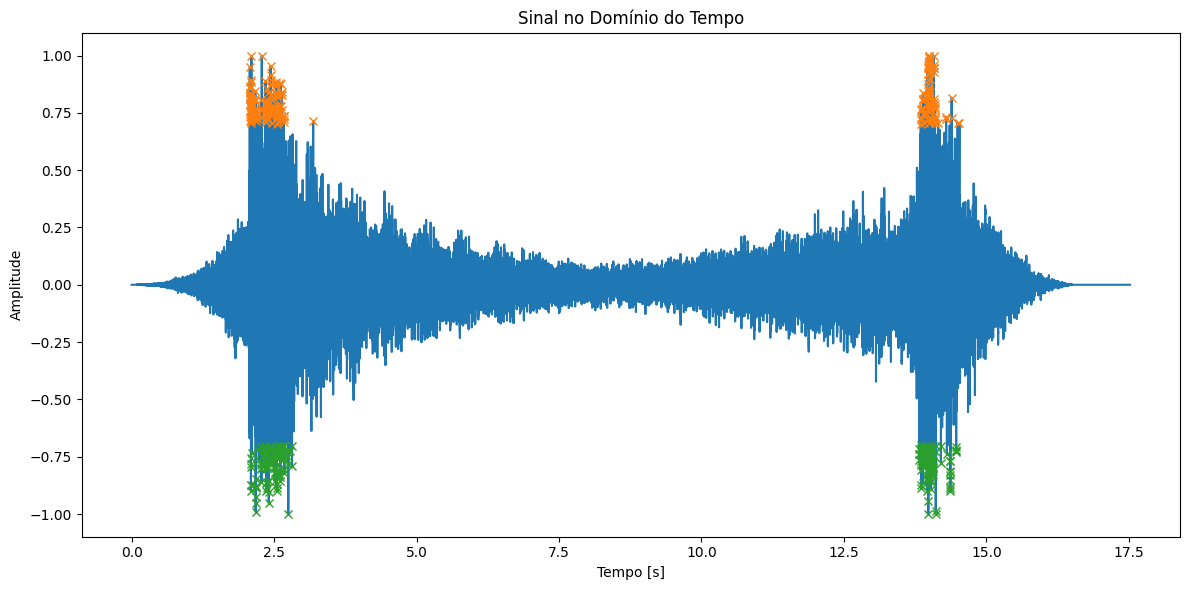

In [5]:
%reset -f
import numpy as np
from scipy.io import wavfile
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
taxa_amostragem,dados_audio = wavfile.read('teste.wav')

if len(dados_audio.shape) > 1:
    dados_audio = dados_audio[:,0]

n = len(dados_audio)

fft_values = np.fft.fft(dados_audio) # armazenamento os valores da FFT do sinal de áudio
fft_freqs = np.fft.fftfreq(n,1/taxa_amostragem) # armazena as frequencias correspodentes

# Retira somente a parte positiva dos espectro de frequência
positive_freq = fft_freqs[:n//2]
positive_fft_values = np.abs(fft_values[:n//2])

# Faço a marcação dos picos que passam de 0.7 de amplitude
Positive_time_peaks, _ = find_peaks(dados_audio, height=0.7)
# Faço a marcação dos picos que passam de -0.7 de amplitude
negative_time_peaks, _ = find_peaks(-dados_audio, height=0.7)

plt.figure(figsize=(12,6))

plt.plot(np.linspace(0,len(dados_audio)/taxa_amostragem, len(dados_audio)),dados_audio,label='Sinal de Áudio')
plt.plot(np.linspace(0,len(dados_audio)/taxa_amostragem, len(dados_audio))[Positive_time_peaks],dados_audio[Positive_time_peaks],"x",label='Picos Positivos')
plt.plot(np.linspace(0,len(dados_audio)/taxa_amostragem, len(dados_audio))[negative_time_peaks],dados_audio[negative_time_peaks],"x",label='Picos Negativos')
plt.title('Sinal no Domínio do Tempo')
plt.xlabel('Tempo [s]')
plt.ylabel('Amplitude')



plt.tight_layout()
plt.show()

# Aplicação do filtro Passa Baixa

In [2]:
%reset -f
import numpy as np
from scipy.io import wavfile
import matplotlib.pyplot as plt
from scipy.signal import find_peaks, butter, filtfilt


In [3]:
def lowpass_filter(data, cutoff_freq, sample_rate, filter_order=5):
    nyquist_rate = 0.5 * sample_rate
    normalized_cutoff = cutoff_freq/ nyquist_rate
    b_coeficiente,a_coeficiente = butter(filter_order, normalized_cutoff, btype='low',analog=False)
    filtered_signal = filtfilt(b_coeficiente,a_coeficiente,data)
    return filtered_signal


C:\Users\Windows\AppData\Local\Temp\ipykernel_8076\1710781380.py:1: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sample_rate, audio_signal = wavfile.read('teste.wav')


Sample Rate: 96000
Audio Signal Shape: (1681979, 2)
Max Value (Original Signal): 0.9989989995956421
Min Value (Original Signal): -0.9989989995956421
Filtered Signal Shape: (1681979,)
Max Value (Filtered Signal): 0.9218245023838619
Min Value (Filtered Signal): -0.9015336645315517


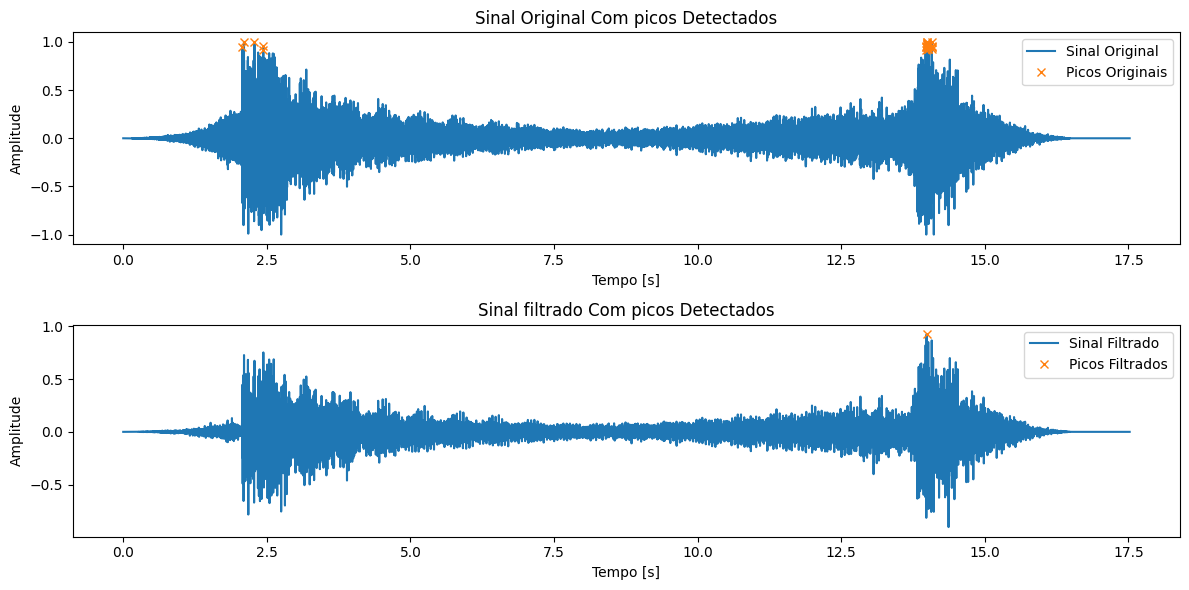

In [4]:
sample_rate, audio_signal = wavfile.read('teste.wav')

print(f"Sample Rate: {sample_rate}")
print(f"Audio Signal Shape: {audio_signal.shape}")
print(f"Max Value (Original Signal): {np.max(audio_signal)}")
print(f"Min Value (Original Signal): {np.min(audio_signal)}")

if len(audio_signal.shape ) > 1:
    audio_signal = audio_signal[:,0]

origianl_peaks, _ = find_peaks(audio_signal, height=0.9)

cutoff_frequency = 300
filtered_signal = lowpass_filter(audio_signal,cutoff_frequency, sample_rate)

filtered_peaks_indice, _ = find_peaks(filtered_signal, height = 0.9)

print(f"Filtered Signal Shape: {filtered_signal.shape}")
print(f"Max Value (Filtered Signal): {np.max(filtered_signal)}")
print(f"Min Value (Filtered Signal): {np.min(filtered_signal)}")

plt.figure(figsize=(12,6))

plt.subplot(2,1,1)

time_axis_original = np.linspace(0, len(audio_signal) / sample_rate, len(audio_signal))
plt.plot(time_axis_original, audio_signal,label='Sinal Original')
plt.plot(time_axis_original[origianl_peaks], audio_signal[origianl_peaks],'x',label="Picos Originais")
plt.title("Sinal Original Com picos Detectados")
plt.xlabel('Tempo [s]')
plt.ylabel('Amplitude')
plt.legend()

plt.subplot(2,1,2)

time_axis_filted = np.linspace(0, len(audio_signal) / sample_rate, len(audio_signal))
plt.plot(time_axis_filted, filtered_signal,label='Sinal Filtrado')
plt.plot(time_axis_filted[filtered_peaks_indice], filtered_signal[filtered_peaks_indice],'x',label="Picos Filtrados")
plt.title("Sinal filtrado Com picos Detectados")
plt.xlabel('Tempo [s]')
plt.ylabel('Amplitude')
plt.legend()

plt.tight_layout()
plt.show()

In [8]:
def normalizate(data):
    max_val = np.max(np.abs(data))
    normalized_data = data / max_val * 2147483647
    return normalized_data.astype(np.int32)

normalzed_filterd_signal = normalizate(filtered_signal)

wavfile.write('saida.wav', sample_rate,normalzed_filterd_signal)

Max Value (Normalized Signal): 2147483647
Min Value (Normalized Signal): -2100214082


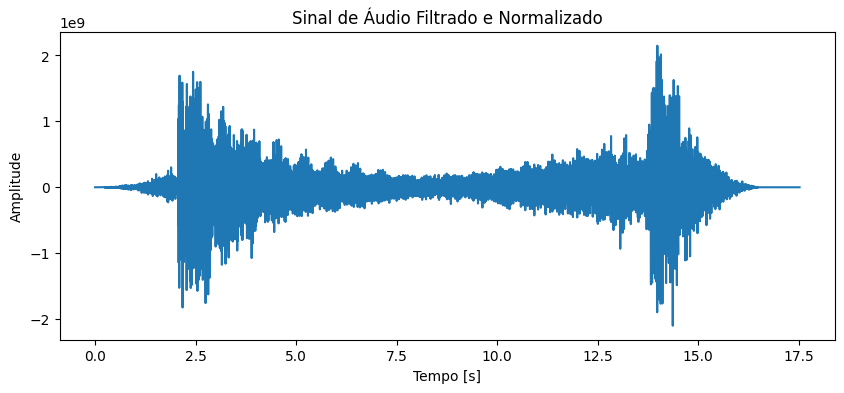

In [7]:
print(f"Max Value (Normalized Signal): {np.max(normalzed_filterd_signal)}")
print(f"Min Value (Normalized Signal): {np.min(normalzed_filterd_signal)}")

# Plotar o sinal filtrado e normalizado
plt.figure(figsize=(10, 4))
plt.plot(time_axis_filted, normalzed_filterd_signal)
plt.title('Sinal de Áudio Filtrado e Normalizado')
plt.xlabel('Tempo [s]')
plt.ylabel('Amplitude')
plt.show()
